In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("datasets/Cancer_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Gereksiz sütunları at.
# df = df.drop(['id', 'Unnamed: 32'], axis=1)
df = df.drop(columns=['id', 'Unnamed: 32'])

# Tüm sütunların frekans dağılımlarını almak için boş sözlük oluştur.
value_counts_dict = {}
for sutun in df.columns:
    value_counts_dict[sutun] = df[sutun].value_counts()

# Her sütunun frekans dağılımını yazdırmak için
for sutun, counts in value_counts_dict.items():
    unique_count = df[sutun].nunique()          # Her sütundaki benzersiz değer sayısını hesaplar.
    print(f"Sütun: {sutun}")
    print(f'Benzersiz Değer Sayısı: {unique_count}')
    print(counts)
    print("\n")

Sütun: diagnosis
Benzersiz Değer Sayısı: 2
diagnosis
B    357
M    212
Name: count, dtype: int64


Sütun: radius_mean
Benzersiz Değer Sayısı: 456
radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64


Sütun: texture_mean
Benzersiz Değer Sayısı: 479
texture_mean
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: count, Length: 479, dtype: int64


Sütun: perimeter_mean
Benzersiz Değer Sayısı: 522
perimeter_mean
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: count, Length: 522, dtype: int64


Sütun: area_mean
Benzersiz Değer Sayısı: 539
area_mean
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: count, Length: 539, dtype:

In [5]:
# NaN değerleri say.
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
y = df['diagnosis']
x = df.drop(columns=['diagnosis'])

In [7]:
kDegerleriPerformansi = {}
for i in range(1, len(df.index)+1):
    knn_teori = KNeighborsClassifier(n_neighbors=i)
    model = knn_teori.fit(x, y)
    skor = model.score(x, y)
    kDegerleriPerformansi[i] = skor
    print(f'K = {i} için skor: {skor}')

K = 1 için skor: 1.0
K = 2 için skor: 0.9472759226713533
K = 3 için skor: 0.9560632688927944
K = 4 için skor: 0.9490333919156415
K = 5 için skor: 0.9472759226713533
K = 6 için skor: 0.9472759226713533
K = 7 için skor: 0.9437609841827768
K = 8 için skor: 0.9402460456942003
K = 9 için skor: 0.9420035149384886
K = 10 için skor: 0.9384885764499121
K = 11 için skor: 0.9402460456942003
K = 12 için skor: 0.9349736379613357
K = 13 için skor: 0.9384885764499121
K = 14 için skor: 0.9402460456942003
K = 15 için skor: 0.9402460456942003
K = 16 için skor: 0.9349736379613357
K = 17 için skor: 0.9349736379613357
K = 18 için skor: 0.9332161687170475
K = 19 için skor: 0.9332161687170475
K = 20 için skor: 0.9332161687170475
K = 21 için skor: 0.9314586994727593
K = 22 için skor: 0.9314586994727593
K = 23 için skor: 0.929701230228471
K = 24 için skor: 0.9314586994727593
K = 25 için skor: 0.929701230228471
K = 26 için skor: 0.9314586994727593
K = 27 için skor: 0.9314586994727593
K = 28 için skor: 0.9314586

Text(0.5, 1.0, 'K Değerlerine Göre Performans Eğrisi')

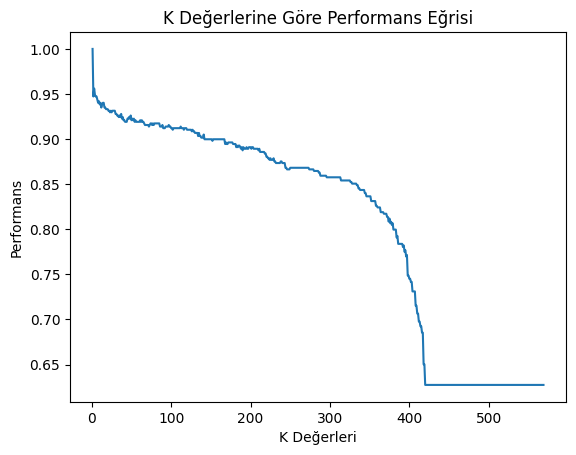

In [8]:
plt.plot(list(kDegerleriPerformansi.keys()), list(kDegerleriPerformansi.values()))
plt.xlabel('K Değerleri')
plt.ylabel('Performans')
plt.title('K Değerlerine Göre Performans Eğrisi')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

In [10]:
kDegerleriPerformansi_egitim = {}
kDegerleriPerformansi_test = {}
for j in range(1, len(x_train.index)+1):
    knn_teori_egitim = KNeighborsClassifier(n_neighbors=j)
    model_egitim = knn_teori_egitim.fit(x_train, y_train)
    skor_egitim = model_egitim.score(x_train, y_train)
    skor_test = model_egitim.score(x_test, y_test)
    kDegerleriPerformansi_egitim[j] = skor_egitim
    kDegerleriPerformansi_test[j] = skor_test
    print(f'K = {j} için Eğitim skoru: {skor_egitim}')
    print(f'K = {j} için Test skoru: {skor_test}')

K = 1 için Eğitim skoru: 1.0
K = 1 için Test skoru: 0.9181286549707602
K = 2 için Eğitim skoru: 0.9447236180904522
K = 2 için Test skoru: 0.9298245614035088
K = 3 için Eğitim skoru: 0.9522613065326633
K = 3 için Test skoru: 0.9181286549707602
K = 4 için Eğitim skoru: 0.9447236180904522
K = 4 için Test skoru: 0.9298245614035088
K = 5 için Eğitim skoru: 0.9396984924623115
K = 5 için Test skoru: 0.9473684210526315
K = 6 için Eğitim skoru: 0.9371859296482412
K = 6 için Test skoru: 0.9473684210526315
K = 7 için Eğitim skoru: 0.9371859296482412
K = 7 için Test skoru: 0.9532163742690059
K = 8 için Eğitim skoru: 0.9321608040201005
K = 8 için Test skoru: 0.9532163742690059
K = 9 için Eğitim skoru: 0.9321608040201005
K = 9 için Test skoru: 0.9590643274853801
K = 10 için Eğitim skoru: 0.9321608040201005
K = 10 için Test skoru: 0.9649122807017544
K = 11 için Eğitim skoru: 0.9346733668341709
K = 11 için Test skoru: 0.9649122807017544
K = 12 için Eğitim skoru: 0.9321608040201005
K = 12 için Test sko

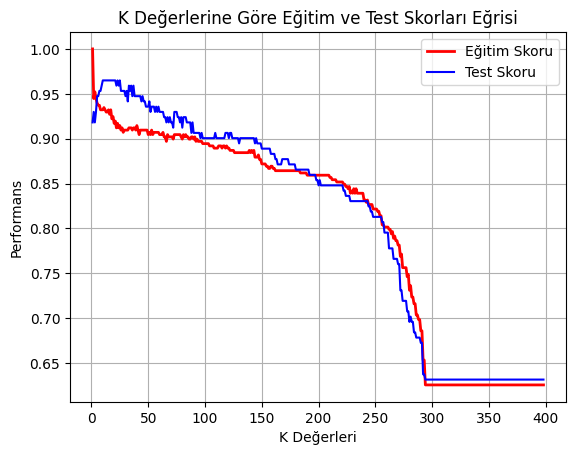

In [11]:
x_degerleri = list(kDegerleriPerformansi_egitim.keys())
y1_degerleri = list(kDegerleriPerformansi_egitim.values())
y2_degerleri = list(kDegerleriPerformansi_test.values())

plt.plot(x_degerleri, y1_degerleri, color='red', label='Eğitim Skoru', linewidth=2)
plt.plot(x_degerleri, y2_degerleri, color='blue', label='Test Skoru', linewidth=1.5)

plt.xlabel('K Değerleri')
plt.ylabel('Performans')
plt.title('K Değerlerine Göre Eğitim ve Test Skorları Eğrisi')

plt.legend()        # Çizgi etiketi bilgisi
plt.grid()          # Arkaplana ızgara eklenmesi
plt.show()
